1. For the Horse Kick data, we already saw that the MLE is just the mean of the observations. Recall that an approximate 95% confidence interval for a Poisson mean parameter $\lambda$ is 
$$ \hat{\lambda}- 1.96\sqrt{\hat{\lambda}/n} < \lambda < \hat{\lambda} + 1.96\sqrt{\hat{\lambda}/n}$$
These can be computed using `pois.approx` in the `epitools` library.

    Compare the 95% confidence intervals for the Horse Kick data as above, with those computed using the log-likelihood.

In [167]:
require(stats4)
horsekick.tab = c(109,65,22,3,1)
names(horsekick.tab) = 0:4 
nloglik = function(lambda) -sum(dpois(0:4,lambda, log=TRUE)*horsekick.tab) 
fit = mle(nloglik, start = list(lambda = 1), nobs = 200L, method = "L-BFGS-B", lower = 1e-6)
# Calculate the confidence interval for lambda using the MLE method
confint(fit) 

Profiling...


2.5 %    97.5 % 
0.5080761 0.7247444

In [171]:
# Here we need to check the convergence
# fit@details

In [173]:
require(epitools) # For the pois.approx function
# Calculate the confidence interval for the mean of the Poisson distribution
pois.approx(sum((0:4)*horsekick.tab), 200)
# Which is as same as the definition
# lhat = sum((0:4)*horsekicks)/200
# lhat + c(-1,1)*1.96*sqrt(lhat/200)

x,pt,rate,lower,upper,conf.level
122,200,0.61,0.5017575,0.7182425,0.95


In [175]:
0.61 - 0.50 

[1] 0.11

In [177]:
0.718 - 0.61

[1] 0.108

In [179]:
0.61- 0.508

[1] 0.102

In [181]:
0.724 - 0.61

[1] 0.114

2. The `R` library `faraway` contains a Swedish `motorins`  data set. The variable `perd` is an average claim cost. Compute the MLE of the shape and scale assuming this data is from a Gamma distribution.

In [23]:
clms = readRDS("clms_data.rds") 

In [183]:
# Negative log-likelihood function of Gamma distribution
nloglik2 = function(alpha, beta)
  -sum(dgamma(clms, shape=alpha, scale=beta, log=TRUE))
fit2 = mle(nloglik2, start=list(alpha=5, beta=3000),
           nobs=length(clms), method = 'L-BFGS', lower = (alpha = 1e-6))

In [185]:
# Using @details to check the convergent condition
fit2@details

,alpha,beta
alpha,1303.5509601,0.5992478691
beta,0.5992479,0.0003301466


In [187]:
## In the case of non-convergence we can restart at the values we got so far
fit3 = mle(nloglik2, start=as.list(coef(fit2)), nobs=length(clms))
## fit3@details

In [189]:
summary(fit3)

Maximum likelihood estimation

Call:
mle(minuslogl = nloglik2, start = as.list(coef(fit2)), nobs = length(clms))

Coefficients:
         Estimate  Std. Error
alpha    1.822291   0.0685222
beta  2998.757926 136.3521067

-2 log L: 33890.17 

3. Repeat 2. using instead a lognormal distribution (`dlnorm`). A random variable $X$ has a lognormal distribution, if its log ($\log X$) has a Normal distribution. The parameters are the mean and standard deviation of the underlying Normal.

    Verify that the maximum likelihood estimates correspond to the mean and standard deviation of the logged data.

In [195]:
nloglik3 = function(mu, sigma)
  -sum(dlnorm(clms, mu, sigma, log=TRUE))

In [ ]:
fit4 = mle(nloglik3, start=list(mu=8, sigma=1),
           nobs=length(clms), method = "L-BFGS", lower = (mu = 1e-6))
fit4@details

In [35]:
mean(log(clms))
sd(log(clms))

[1] 8.307334

[1] 0.7078878

4. For 2. above (Gamma MLE of claims data). Find confidence intervals for the parameters.

In [63]:
fit5 = suppressWarnings(mle(nloglik2, start=list(alpha=1, beta=3000),
             nobs=length(clms), method="Nelder-Mead"))

In [65]:
fit5@details

,alpha,beta
alpha,1058.9631374,0.7421012924
beta,0.7421013,0.0006584742


In [69]:
suppressWarnings(confint(fit5))

Profiling...


,2.5 %,97.5 %
alpha,2.021565,2.283858
beta,2262.746860,2595.926594


5. For 2. above (Gamma MLE of claims data). Conduct a Likelihood Ratio test of $H_0: \alpha=2$ versus $H_A: \alpha\neq 2$.

In [110]:
nloglik2 = function(alpha, beta)
  -sum(dgamma(clms, shape=alpha, scale=beta, log=TRUE))

Warning message in optim(start, f, method = method, hessian = TRUE, ...):
"bounds can only be used with method L-BFGS-B (or Brent)"

In [197]:
fit2 = mle(nloglik2, start=list(alpha=5, beta=3000),
           nobs=length(clms), method = 'Nelder-Mead', lower = list(alpha = 1e-6, beta = 1e-6))
nloglik.null = function(beta)
  nloglik2(2, beta)

Warning message in optim(start, f, method = method, hessian = TRUE, ...):
"bounds can only be used with method L-BFGS-B (or Brent)"

In [199]:
fit.null = mle(nloglik.null, start=list(beta=2400), 
               nobs=length(clms))

In [201]:
T1 = as.numeric(2*(logLik(fit2) - logLik(fit.null)))
p.val = 1 - pchisq(T1,1)

In [203]:
T1

[1] -29.19299

In [205]:
p.val

[1] 1

In [100]:
logLik(fit2)

'log Lik.' -16945.08 (df=2)

In [102]:
logLik(fit.null)

'log Lik.' -16930.49 (df=1)

In [108]:
summary(clms) 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     72    2643    4375    5206    5985   31442 

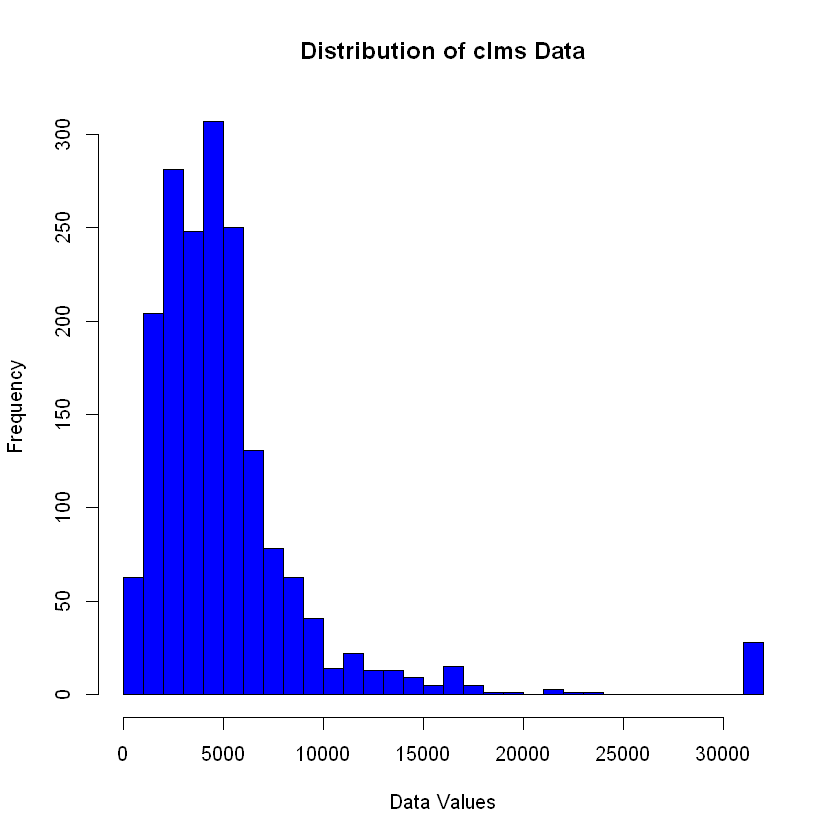

In [116]:
hist(clms, breaks=30, col='blue', border='black', 
     main='Distribution of clms Data', 
     xlab='Data Values', ylab='Frequency')

In [130]:
clms_clean = clms[clms <= 15000]
nloglik2 = function(alpha, beta)
  -sum(dgamma(clms_clean, shape=alpha, scale=beta, log=TRUE))
fit2 = mle(nloglik2, start=list(alpha=5, beta=3000),
           nobs=length(clms_clean), method = 'Nelder-Mead', lower = list(alpha = 1e-6, beta = 1e-6))
nloglik.null = function(beta)
  nloglik2(2, beta)
fit.null = mle(nloglik.null, start=list(beta=2400), 
               nobs=length(clms_clean))
T1 = as.numeric(2*(logLik(fit2) - logLik(fit.null)))
p.val = 1 - pchisq(T1,1)

Warning message in optim(start, f, method = method, hessian = TRUE, ...):
"bounds can only be used with method L-BFGS-B (or Brent)"

In [134]:
T1
p.val

[1] 136.5957

[1] 0

In [ ]:
# Here we can see the value of p is almost zero, that means we should reject the H0. That means alpha is not two. 

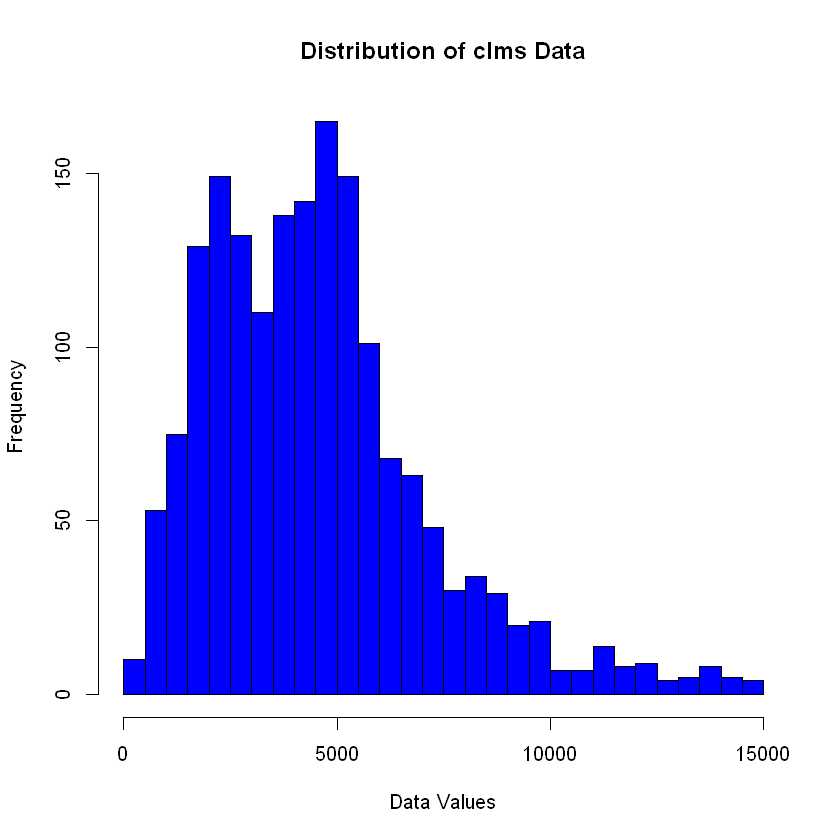

In [132]:
hist(clms_clean, breaks=30, col='blue', border='black', 
     main='Distribution of clms Data', 
     xlab='Data Values', ylab='Frequency')

6. The `crabsmolt.csv` data consists of before and after molting measurements on `r nrow(molt)` female Dungeness crabs. Crabs molt their shells periodically in order to grow.

    (Harder) Using `mle` estimate the slope, intercept and residual standard error of a simple linear regression of `postsz` on `presz`. Compare to estimates obtained using `lm`.

In [138]:
molt = read.csv("crabsmolt.csv")

In [159]:
# Define the negative loglikelihood function for linear regression
nloglik4 = function(alpha, beta, sigma)
  -sum(dnorm(molt$postsz, mean=alpha+beta*molt$presz,
             sd=sigma, log=TRUE))
fit5 = suppressWarnings(mle(nloglik4, start=list(alpha=0, beta=1, sigma=1),
           nobs=nrow(molt)))
fit5@details 

,alpha,beta,sigma
alpha,1.151297e+02,1.487612e+04,-2.374492e-04
beta,1.487612e+04,1.951086e+06,4.621654e-04
sigma,-2.374492e-04,4.621654e-04,2.302643e+02


In [161]:
# Here lm refers to the linear regression method. 
fit.lm = lm(postsz~presz, data=molt)
summary(fit.lm)


Call:
lm(formula = postsz ~ presz, data = molt)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.4269  -1.1611  -0.0669   1.2169   5.9251 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.802580   0.767201   33.63   <2e-16 ***
presz        0.913965   0.005893  155.08   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.029 on 470 degrees of freedom
Multiple R-squared:  0.9808,	Adjusted R-squared:  0.9808 
F-statistic: 2.405e+04 on 1 and 470 DF,  p-value: < 2.2e-16
